# LINEAR MODEL AND ITS PROPERTIES

**Authors:**  
- Nava del Río José Antonio  
- Ojeda Contreras Braulio Melquisedec   
- Suárez Pérez Juan Pablo  
- Vázquez Portuguez José Antonio  

**Date:** 07/10/2023

## Instructions

1. Generate a linear model that will be the underlying model of a population to be able to fit a regression. The model must be a single variable. Graph this model.
2. Sample N data from the population and graph them together with the underlying model. Don't forget to add noise to the samples.
3. Fit a linear model for the N samples using the parameter estimates seen in class. Plot the fitted model together with the population model.
4. Check that the sum of the residuals is equal to zero.
5. Check that the covariance between the features and the residuals is equal to zero.
6. Prove that the mean of the features and the mean of the target values is on the line of the fitted linear model. Graph them.

### Env

In [1]:
# Libraries needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Linear Model

In [2]:
# Function to generate a random linear model.
def generate_model():
    """
        Generation of random linear model with a normal distribution 
        with mean 0 and variance 1.
        Arguments:
            none.
        Returns:
            linear_model: a list with m_1 and b_0.
    """
    # Generation of linear model
    b_1 = np.random.normal(0, 1)
    b_0 = np.random.normal(0, 1)
    linear_model = [b_1, b_0]
    
    return linear_model

In [3]:
# Function to implement a linear model.
def linear_model(b_1, b_0, X):
    """
        Implementation of linear model.
        Arguments:
            b_1: an integer value.
            b_0: an integer value.
            X: a list of values.
        Returns:
            y: a list of values.
    """
    # Generation of y.
    y = b_1 * X + b_0
    
    return y

In [4]:
# Linear model initialization parameters.
N = 200
min_x = 0
max_x = 21

In [5]:
# Generation of the linear model.
b_1, b_0 = generate_model()
# Implementation of the linear model.
X = np.linspace(min_x, max_x, N)
lm = linear_model(b_1, b_0, X)

In [6]:
# Generation of points to graph the population.
y = lm + np.random.normal(0, 1, N)

### Population generation

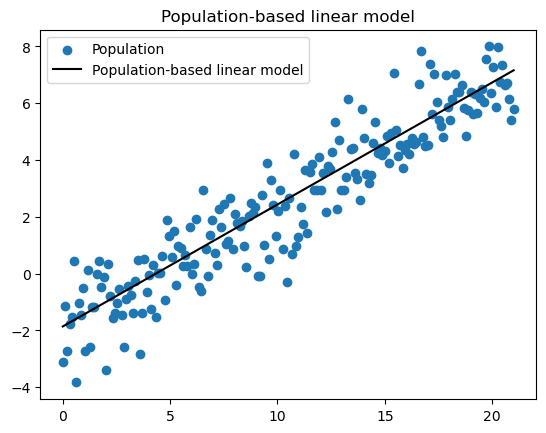

In [7]:
# Model graphing 
plt.scatter(X, y, label = "Population")
plt.plot(X, lm, label="Population-based linear model", color="black")
plt.legend()
plt.title("Population-based linear model")
plt.show()

### Population sampling

In [8]:
# Sampling of points from the total population.
n_sample = 50
idx_X_sample = np.random.randint(0, N, n_sample)
X_sample = X[idx_X_sample]
y_sample = y[idx_X_sample]

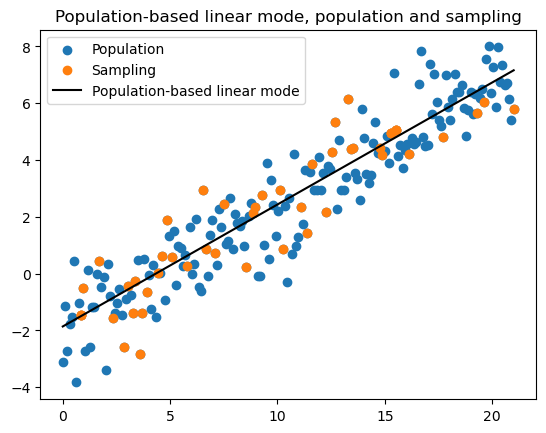

In [9]:
# Underlying linear model, population and sampling graphing.
plt.scatter(X, y, label="Population")
plt.scatter(X_sample, y_sample, label="Sampling")
plt.plot(X, lm, label="Population-based linear mode", color="black")
plt.legend()
plt.title("Population-based linear mode, population and sampling")
plt.show()

### Linear model fitting with sampling

In [10]:
# Function to get estimators.
def fit_linear_model(X, y):
    """
        Fitting the estimators of linear model.
        Arguments:
            X: a list of values.
            y: a list of values.
        Return:
            estimators: a list with b_1_est and b_0_est.
    """
    # Creation of ones array.
    ones_array = np.ones(len(X))
    # Concatenation of arrays.
    A = np.vstack([X, ones_array]).T
    # Fitting estimators.
    b_1_est, b_0_est = np.linalg.lstsq(A, y, rcond=None)[0]
    estimators = [b_1_est, b_0_est]
    
    return estimators

In [11]:
# Getting the estimators.
b_1_est, b_0_est = fit_linear_model(X_sample, y_sample)
# Print of estimators and population-based linear model.
print("Estimators:")
print(f'\t(b_1_est, b_0_est) = ({b_1_est:.2f}, {b_0_est:.2f})')
print("Population-based linear model:")
print(f'\t(b_1, b_0) = ({b_1:.2f}, {b_0:.2f})')

Estimators:
	(b_1_est, b_0_est) = (0.42, -1.83)
Population-based linear model:
	(b_1, b_0) = (0.43, -1.86)


In [12]:
# Estimators-based linear model.
lm_est = linear_model(b_1_est, b_0_est, X)

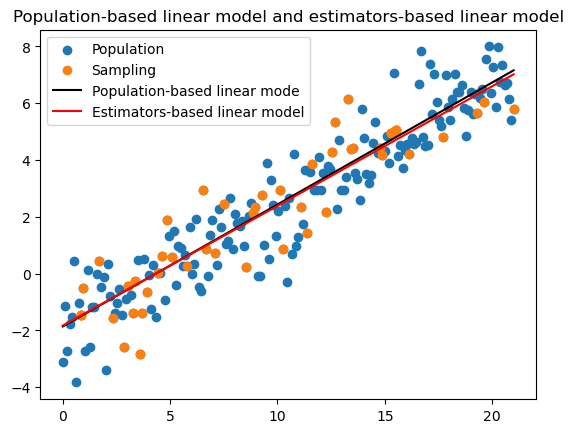

In [13]:
# Population-based linear model and estimators-based linear model graphing.
plt.scatter(X, y, label="Population")
plt.scatter(X_sample, y_sample, label="Sampling")
plt.plot(X, lm, label="Population-based linear mode", color="black")
plt.plot(X, lm_est, label="Estimators-based linear model", color="red")
plt.legend()
plt.title("Population-based linear model and estimators-based linear model")
plt.show()

In [14]:
# Getting the residuals.
y_adjusted = lm_est[idx_X_sample]
residuals = y_sample - y_adjusted

In [15]:
# Checking that the sum of the residuals is equal to zero.
residuals_sum = np.sum(residuals)
assert np.isclose(residuals_sum, 0), f'Error: The sum of the residuals is not close to zero. Sum of the residuals: {residuals_sum:.2f}'
print(f'The sum of the residuals is close to zero. Sum of the residuals: {residuals_sum:.2f}')

The sum of the residuals is close to zero. Sum of the residuals: -0.00


In [16]:
# Checking that the covariance between the features and the residuals is equal to zero.
cov_X_residuals = np.cov(X_sample, residuals)[0, 1]
assert np.isclose(cov_X_residuals, 0), f'Error: the covariance between the characteristic and the residuals is not close to zero. Cov: {cov_X_residuals:.2f}'
print(f'The covariance between the characteristic and the residuals is close to zero. Cov: {cov_X_residuals:.2f}')

The covariance between the characteristic and the residuals is close to zero. Cov: -0.00


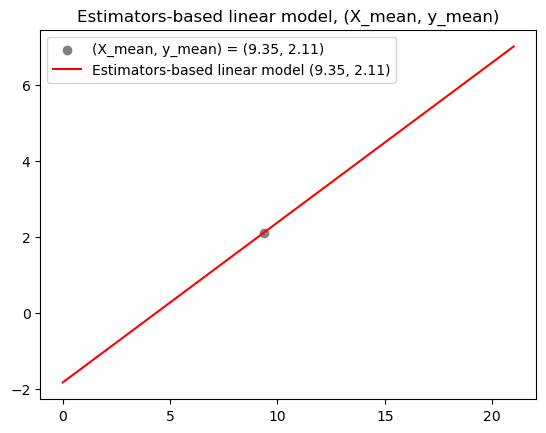

In [17]:
# Proving that the mean of the features and the mean of the target values is on the line of the fitted linear model. 
X_mean = np.mean(X_sample)
y_mean = np.mean(y_sample)
intersection = linear_model(b_1_est, b_0_est, np.array([X_mean]))[0]
# Estimators-based linear model, (X_mean, y_mean) graphing.
plt.scatter(X_mean, y_mean, label=f'(X_mean, y_mean) = ({X_mean:.2f}, {y_mean:.2f})', color='grey')
plt.plot(X, lm_est, label=f'Estimators-based linear model ({X_mean:.2f}, {intersection:.2f})', color="red")
plt.legend()
plt.title("Estimators-based linear model, (X_mean, y_mean)")
plt.show()